## **필사 참고 링크**
1. 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machine learning
    - https://kaggle-kr.tistory.com/17?category=868316
2. EDA To Prediction(DieTanic)
    - https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib의 기본 scheme 말고  seaborn scheme을 세팅하면
# 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용할 수 있어  편함
plt.style.use('seaborn')
sns.set(font_scale=2.5)
# seaborn으로 출력한 그래프의 격자무늬를 흰 무늬로 바꿔줌
sns.set_theme(style='whitegrid')

In [3]:
import missingno as msno

In [4]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline

# **데이터 분석 작업 프로세스**
1. 데이터셋 확인
    - 대부분의 캐글 데이터는 잘 정제되어 있으나 가끔 null data존재하므로 이를 확인하고 향후 수정 필요
2. 탐색적 데이터분석(EDA)
    - 여러 feature들을 개별적으로 분석하고 feature들 간 상관관계를 확인
    - 여러 시각화 툴을 사용하여 insight 얻기
3. feature engineering
    - 모델을 선택하기 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering함.
    - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등
4. model 만들기
    - 머신러닝 위해 sklearn을 사용해 모델 만듬
    - 딥러닝 위해 tensorflow, pytorch 사용해 모델 만듬
5. 모델 학습 및 예측
    - trainset으로 선언한 모델 학습 시킨 후, testset을 가지고 prediction
6. 모델 평가
    - 예측 성능이 원하는 수준인지 판단
    - 풀려는 문제에 따라 모델을 평가하는 방식도 달라짐
    - 학습된 모델이 어떤 것을 학습하였는지 확인

# 1. Dataset 확인

## **1.1. load**

In [6]:
train_data_path = './data/titanic/train.csv'
test_data_path = './data/titanic/test.csv'

In [7]:
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.2. **각 피쳐 고유값 확인**

In [9]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# df_train['PassengerId'].unique()

In [11]:
# df_train['Survived'].sort_values().unique()

In [12]:
# df_train['Pclass'].sort_values().unique()

In [13]:
# df_train['Name'].sort_values().unique()

In [14]:
# df_train['Sex'].sort_values().unique()

In [15]:
# df_train['Age'].sort_values().unique()

In [16]:
# df_train['SibSp'].sort_values().unique()

In [17]:
# df_train['Parch'].sort_values().unique()

In [18]:
# df_train['Ticket'].sort_values().unique()

In [19]:
# df_train['Fare'].sort_values().unique()

In [20]:
# df_train['Cabin'].sort_values().unique()

In [21]:
# df_train['Embarked'].sort_values().unique()

|변수(feature, variable)|정의|설명|타입|
|-----|-----|-----|-----|
|PassengerId|승객 번호| 고유 id|integer|
|Survived|생존 여부|target label로서 0=생존, 1=죽음|integer|
|Pclass|티켓 등급|1=1st, 2=2nd, 3=3rd 등급으로 나뉘며 categorical feature|integer|
|Name|이름|이름|string|
|Sex|성별|male=남자, female=여자로 구분되며 binary|string|
|Age|나이|continuous|integer|
|SibSp|함게 탑승한 형제, 자매 및 배우자의 수|quantitative|integer|
|Parch|함께 탑승한 부모, 아이의 수|quantitative|integer|
|Ticket|티켓 번호|alphabet + integer|string|
|Fare|탑승료|cotinuous|float|
|Cabin|객실 번호|alphabet + interger|string|
|Embarked|탑승 항구|C=Cherbourg, Q=Queenstown, S=Southampton|string|

- 데이터셋의 각 피쳐(칼럼)이 무엇을 의미하는지 미리 파악하는 게 중요

## **1.3. 기초통계량 확인**

In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 승객의 ID값을 나타내는 'PassengerId' 칼럼의 기초통계량 count와 'Age', 'Fare'의 count가 불일치하는 것으로미루어보아 결측치가 존재하는 것을 알 수 있음

## 1.4. Null data check

In [24]:
df_train.agg(lambda x: sum(x.isnull()) / len(df_train))

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [25]:
df_test.agg(lambda x: sum(x.isnull()) / len(df_test))

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

- missingno(msno) 라이브러리를 사용하여 null data 쉽게 보기

<AxesSubplot:>

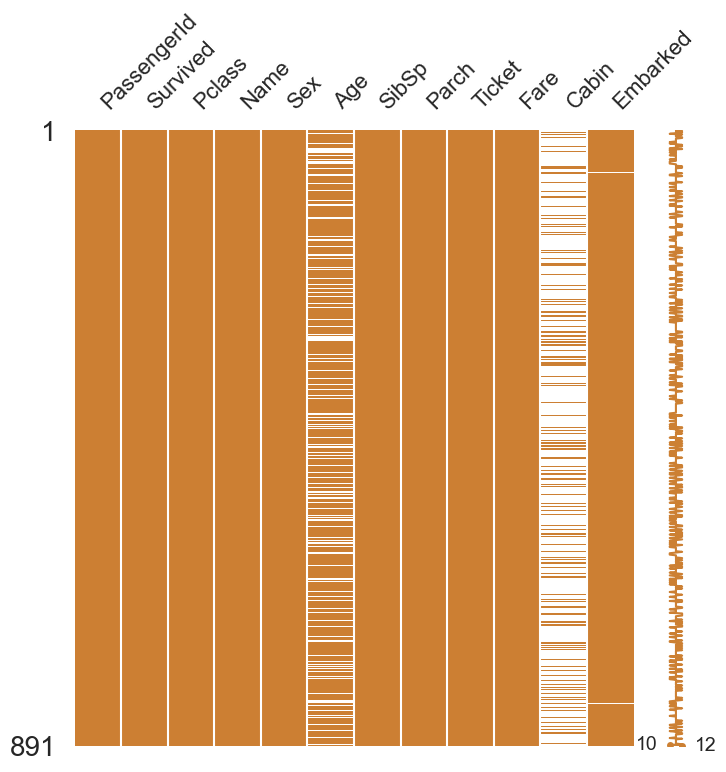

In [26]:
msno.matrix(df=df_train, figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

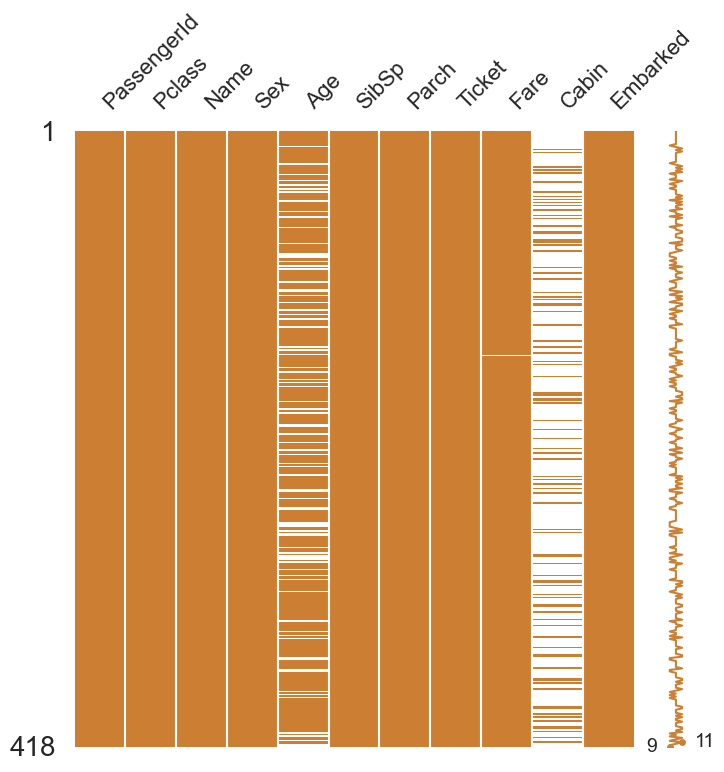

In [27]:
msno.matrix(df=df_test, figsize=(8, 8), color=(0.8, 0.5, 0.2))

## **1.5. Target label 확인**

- target label이 어떤 distribution을 가지고 있는지 확인
- 현 데이터셋과 같이 binary classification 문제의 경우 1과 0의 분포에 따라 모델의 평가방법이 달라짐

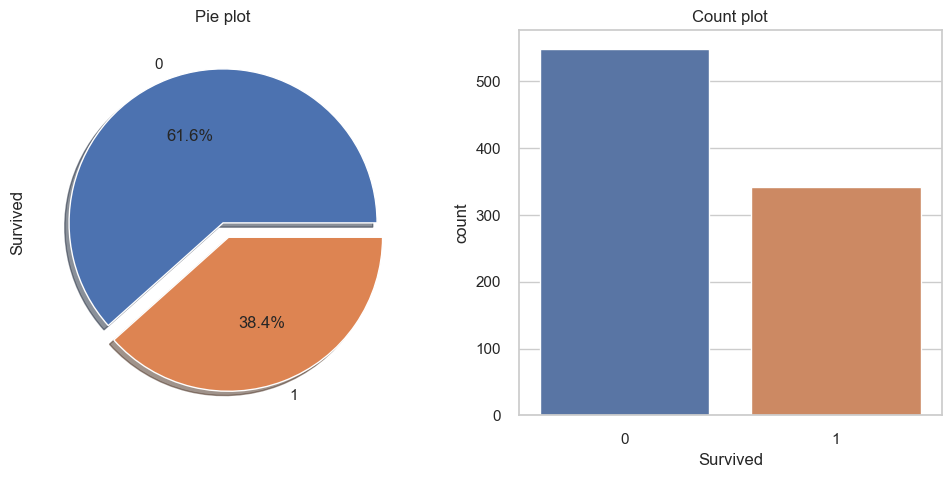

In [28]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             ax=ax[0])
ax[0].set_title('Pie plot')

sns.countplot(data=df_train, x='Survived', ax=ax[1])
ax[1].set_title('Count plot')

plt.show()

# **2. Exploratory Data Analysis(EDA)**

- 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요
- 특정 목적에 맞는 소스코드를 정리해두어 필요할때마다 참고해서 적용할 것

## **2.1. Pcalss**

- categorical & ordinal data
- Pclass에 따른 생존률 차이 살펴보기

In [29]:
# Pcalss 별 탑승객 수
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [30]:
# Pclass 별 생존자 수
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [31]:
# Pcalss 별 생존률
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [32]:
# 위의 과정을 쉽게 보기
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

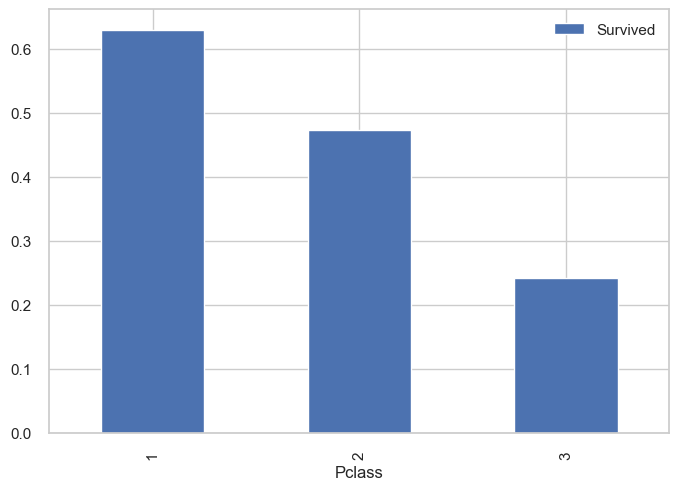

In [33]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()

- 보이는 바와 같이 Pclass가 좋을수록(1>2>3) 생존률이 높은 것을 확인 할 수 있음

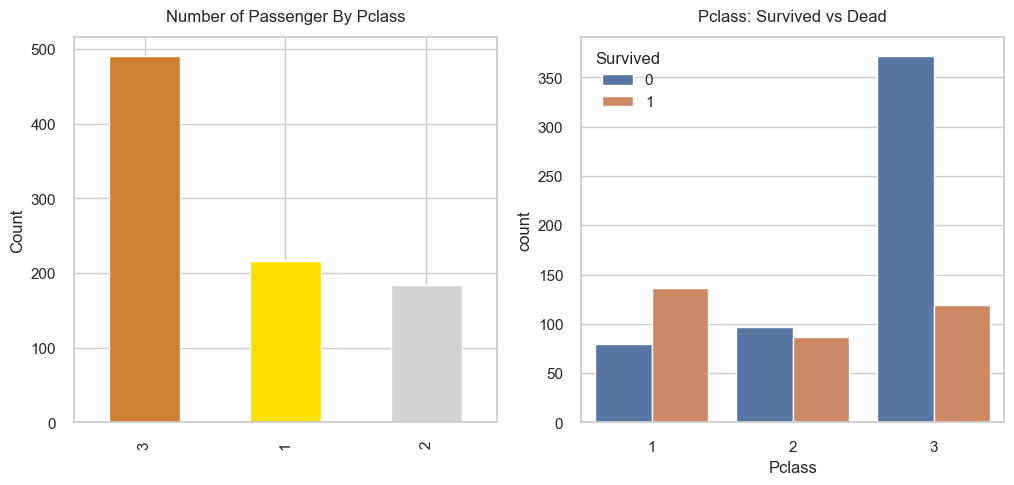

In [34]:
y_position = 1.02
_, ax = plt.subplots(1, 2, figsize=(12, 5))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],
                                           ax=ax[0])
ax[0].set_title('Number of Passenger By Pclass', y=y_position)
ax[0].set_ylabel('Count')

# hue는 색을 의미하며, 각 범주형 데이터를 색상으로 구분해줌
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

- 클래스가 높을수록 생존확률이 높음
- 이를 통해 생존에 Pclass가 큰 영향을 미친다고 추측할 수 있으며, 나중에 모델링 수행 시 이 feature를 사용하면 좋을 것이라 기대할 수 있음

## **2.2. Sex**

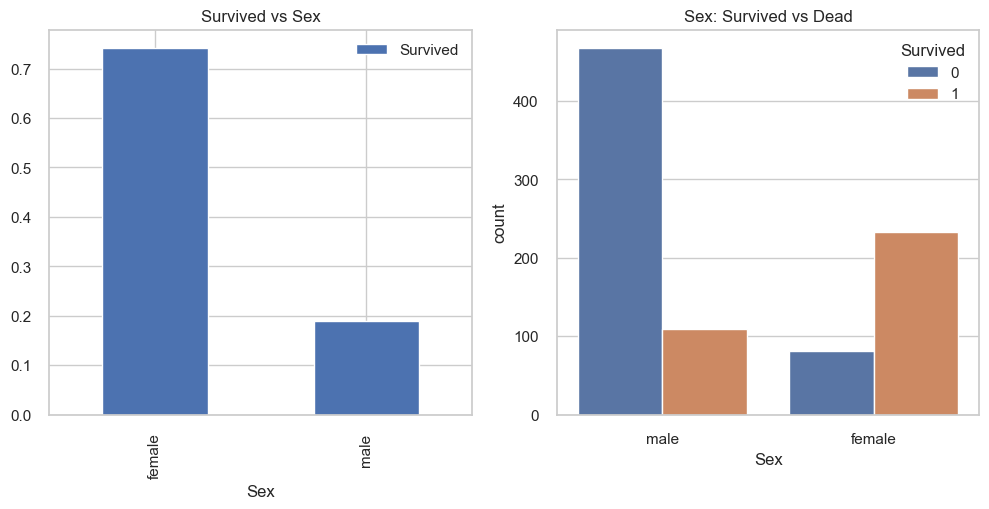

In [35]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

- 여자가 남자보다 생존할 확률이 높은 것이 확인 됨

In [36]:
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [37]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature임을 확인할 수 있음

## 2.3. Both Sex and Pclass

- 이번에는 Sex, Pclass 두 피쳐를 동시에 분석하여 생존이 어떻게 달라지는지 확인
- seaborn의 catorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있음

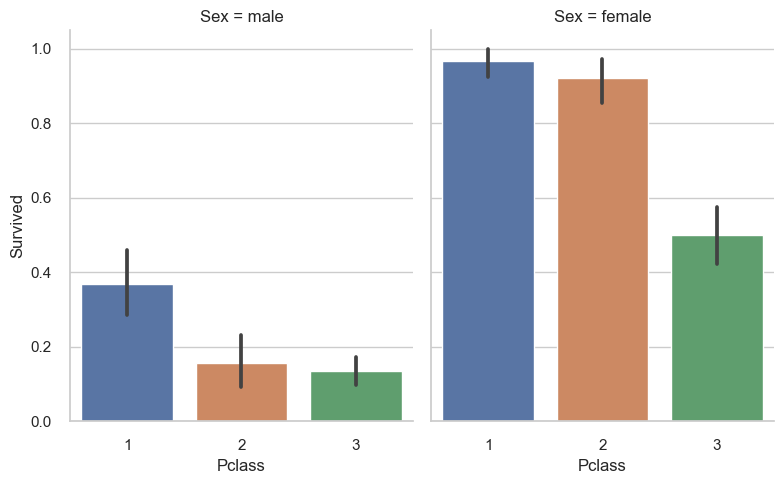

In [38]:
sns.catplot(data=df_train, kind='bar', x='Pclass', y='Survived', col='Sex', aspect=0.8)

- 모든 클래스에서 female의 생존 확률이 높은 것을 확인할 수 있음
- 또한 남자, 여자 모두 클래스가 높을수록 살 확률이 높음

## **2.4. Age**

In [39]:
print('제일 나이 많은 탑승객 : {:.1f} 세'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))
print('탑승객 중간 나이 : {:.1f} Years'.format(df_train['Age'].median())) 

제일 나이 많은 탑승객 : 80.0 세
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years
탑승객 중간 나이 : 28.0 Years


- 생존에 따른 Age의 커널 밀도 추정(KDE: Kernel Density Estimator)
- 히스토그램은 구간 설정에 따라 결과물 해석에 영향을 줄 수 있어 대안으로 사용하는 그래프

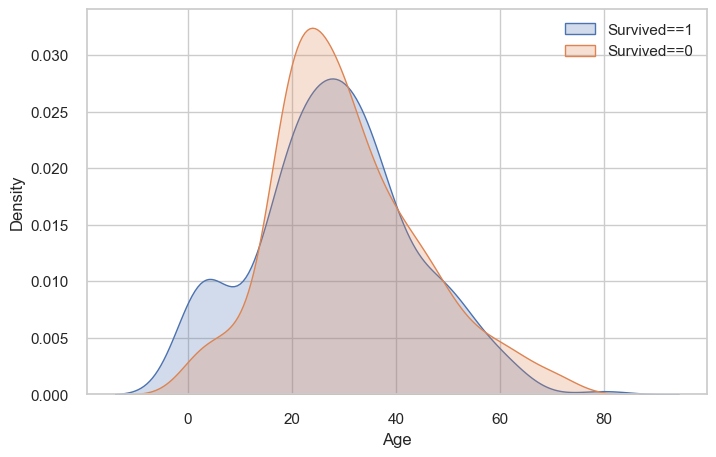

In [40]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.kdeplot(df_train['Age'][df_train['Survived']==1], ax=ax, shade=True)
sns.kdeplot(df_train['Age'][df_train['Survived']==0], ax=ax, shade=True)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

- 10살 미만의 아이들의 경우 사상자수보다 생존자 수의 비중이 큼

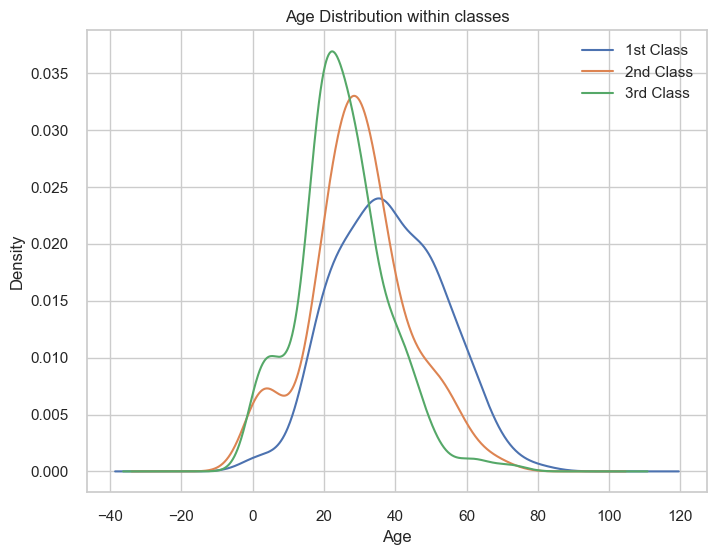

In [41]:
# Age distribution within classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Class가 높을수록 나이 많은 사람의 비중이 커짐

Text(0.5, 0, 'Range of Age(0~x)')

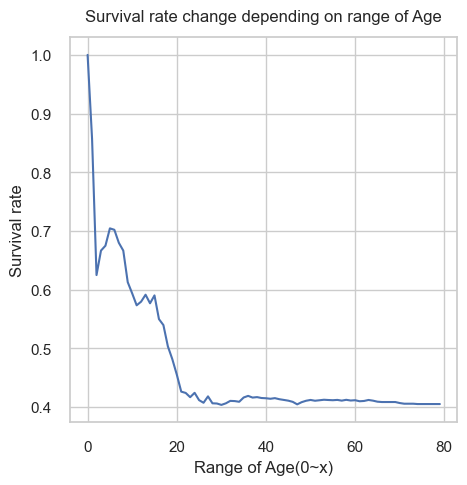

In [42]:
cummulate_survival_ratio = []
for i in range(1, int(df_train['Age'].max())+1):
    cummulate_survival_ratio.append(df_train['Survived'][df_train['Age'] < i].sum() / len(df_train['Survived'][df_train['Age'] < i]))
    
plt.figure(figsize=(5, 5))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

- 나이가 어릴수록 생존률이 높은 것이 확인됨
- 나이가 중요한 feagture로 쓰일 수 있음을 확인

## **2.5. Pclass, Sex, Age**

- 앞서 주요 feature로 선택한 세 변수에 대해 시각화하여 인사이트 추출

In [43]:
import matplotlib

In [44]:
matplotlib.__version__

'3.5.3'

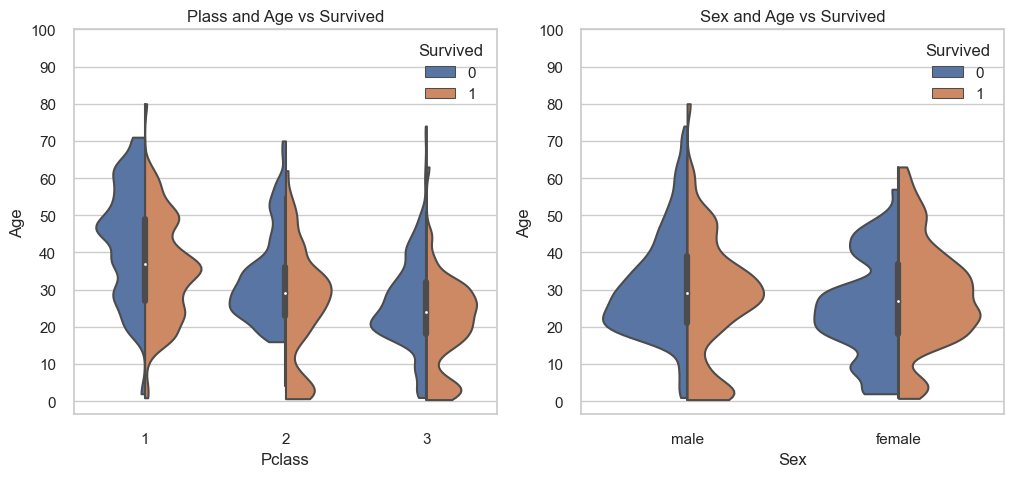

In [45]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived',
            kind='violin', bw=0.2, cut=0, split=True, ax=ax[0])
ax[0].set_title('Plass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data=df_train, x='Sex', y='Age', hue='Survived',
           kind='violin', bw=0.2, cut=0, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

# bw : 데이터의 실제 분포를 얼마나 자세히 반영할지 지정
# cut : 그래프의 시작 위치 지정

- Pclass 별 Age와 Sex의 distribution이 어떻게 다른지를 생존여부에 따라 구분
- 여성과 아이를 먼저 챙겼다는 사실을 유추해볼 수 있음

## **2.6. Embarked**

- Emabarked는 탑승 항구를 나타내는 데이터
- 탑승위치에 따른 생존률 확인 필요

<AxesSubplot:xlabel='Embarked'>

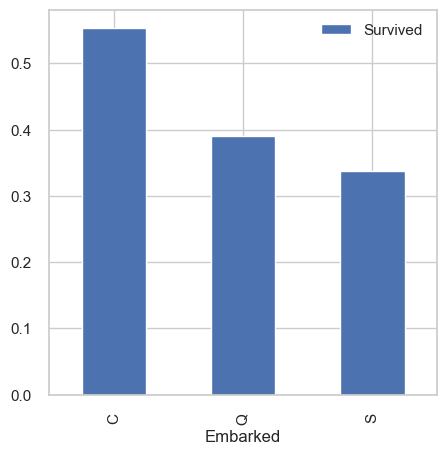

In [46]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))

df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 항구 별 탑승자의 생존률에 차이가 있는것으로 보아 feature로 사용 가능

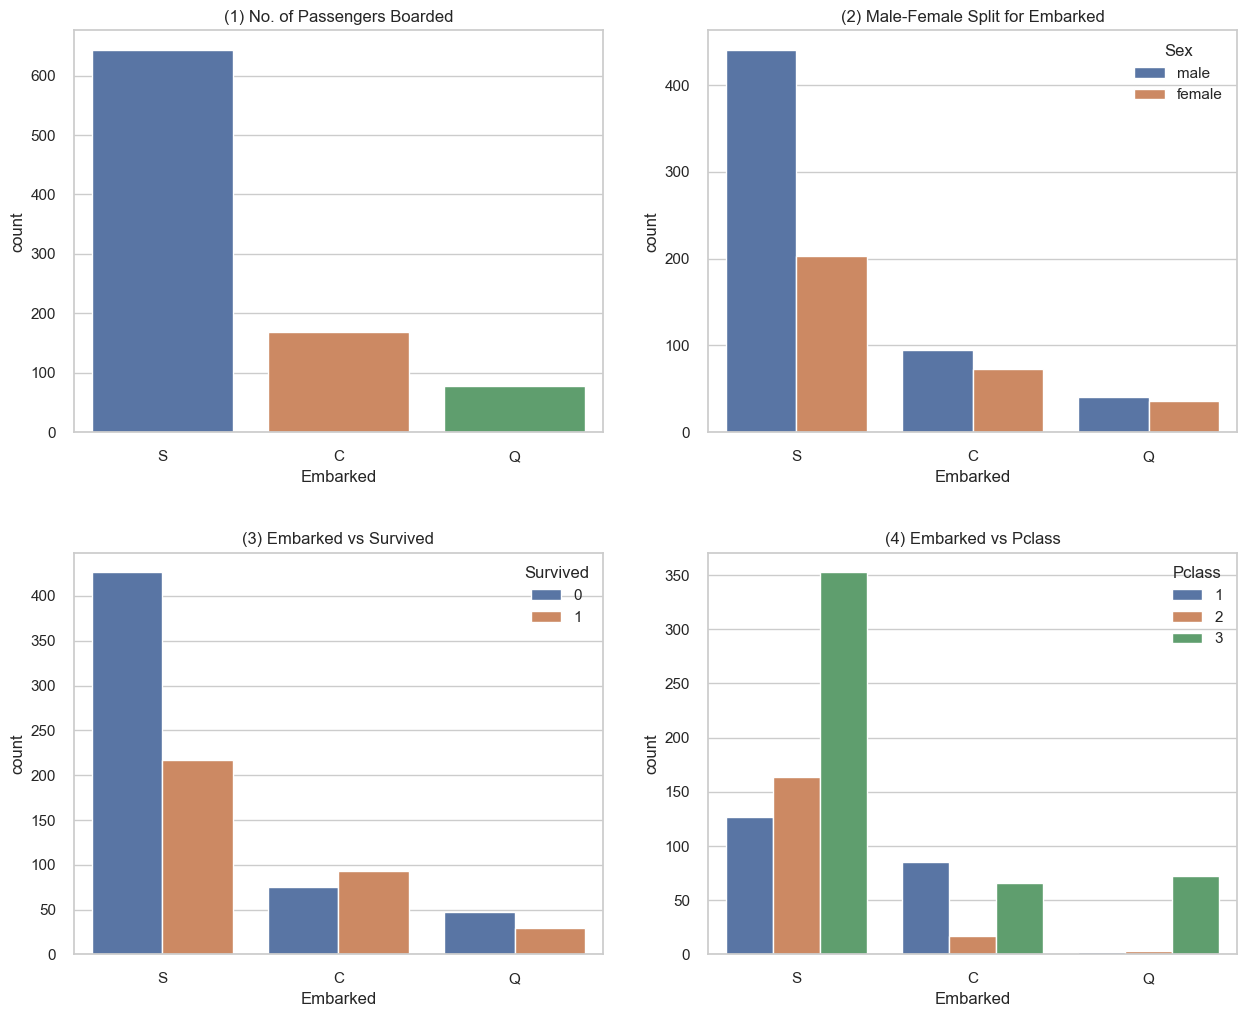

In [47]:
_, ax = plt.subplots(2, 2, figsize=(15,12))

sns.countplot(data=df_train, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

sns.countplot(data=df_train, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(data=df_train, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

- Fig(1) - S항구에서 가장 많은 사람이 탑승한 것을 확인
- Fig(2) - C와 Q는 탑승객 남녀의 비율이 비슷하고, S는 남성이 두배가량 많음
- Fig(3) - S 항구 탑승객이 생존확률이 많이 낮음. 2.5. Pclass, Sex, Age에서 확인 되었듯이 남자보다 여자를 챙기고자했던 현장 상황을 다시한번 유추해볼 수 있음
- Fig(4) - Fig(3)에서 C 항구 탑승자의 생존률이 높았던 이유는 '2.1. Pclass'에서 확인한 바와 같이 Pclass 1 탑승자 비율이 높기 때문인 것으로 알 수 있음

## **2.7. Family - SibSp(형제 자매) + Parch(부모, 자녀)**

- SibSp와 Parch를 합쳐 Family 단위로 분석 진행

In [48]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 본인 포함 위해 +1 +

In [49]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 본인 포함 위해 +1

In [50]:
print('Maximum size of Family :', df_train['FamilySize'].max())
print('Minimum size of Family :', df_train['FamilySize'].min())

Maximum size of Family : 11
Minimum size of Family : 1


- FamilySize와 생존의 관계를 살펴보기

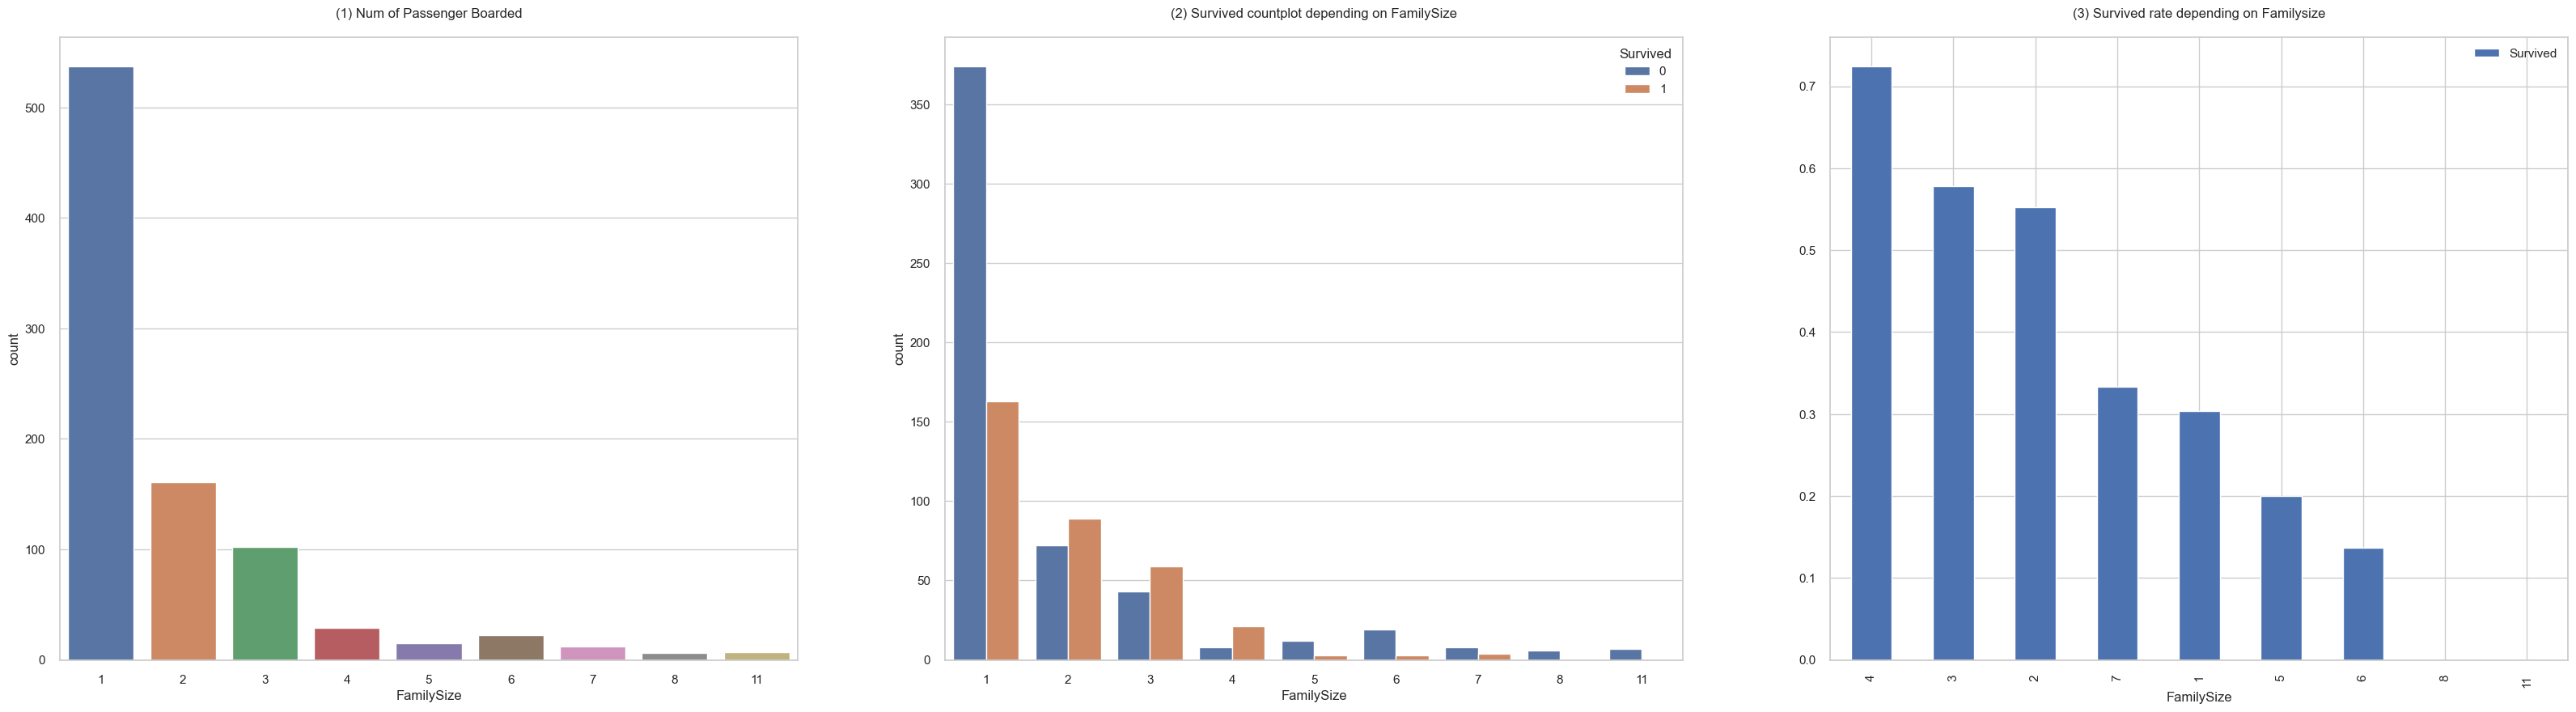

In [51]:
_, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot(data=df_train, x='FamilySize', ax=ax[0])
ax[0].set_title('(1) Num of Passenger Boarded', y=1.02)

sns.countplot(data=df_train, x='FamilySize', hue='Survived', ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Familysize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Fig(1) - 탑승자의 가족 구성원은 최소 1명에서 11명이며 대부분 1명임
- Fig(2) - 가족 구성원 크기에 따른 생존률 비교. 가족이 2~4명인 경우의 생존률이 가장 높음.
- Fig(3) - 가족 구성원 크기에 따른 평균 생존률 비교. 가족 구성원 2~4명인 경우 생존률 50% 이상

## **2.8. Fare**

- Fare는 탑승요금이며, continuous feature이므로 histogram으로 인사이트 추출 필요

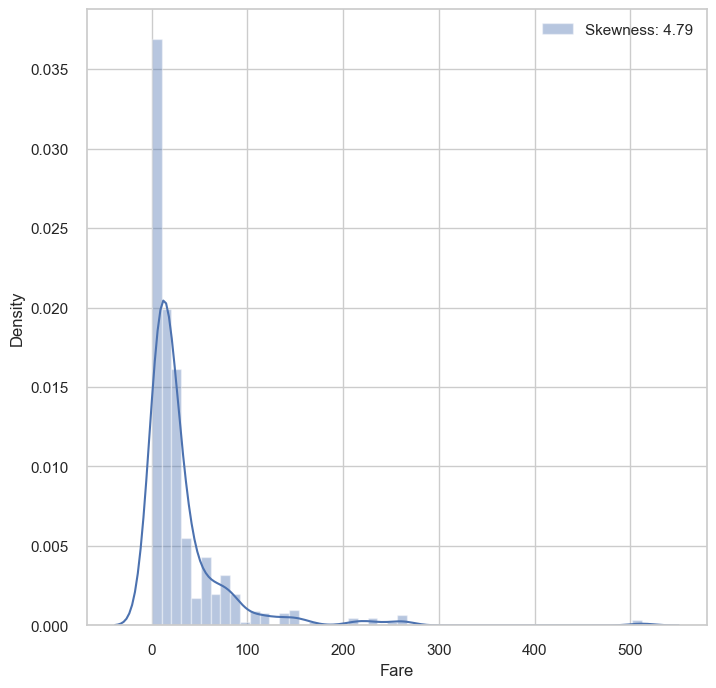

In [52]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- high skewness
- 이대로 모델에 input하면 잘못 학습할 가능성 큼
- 몇 개 없는 outlier에 대해 민감하게 반응할 경우 실제 예측 시 좋지 못한 결과 초래
- outlier의 영향 줄이기 위해 Fare에 log 적용

In [53]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

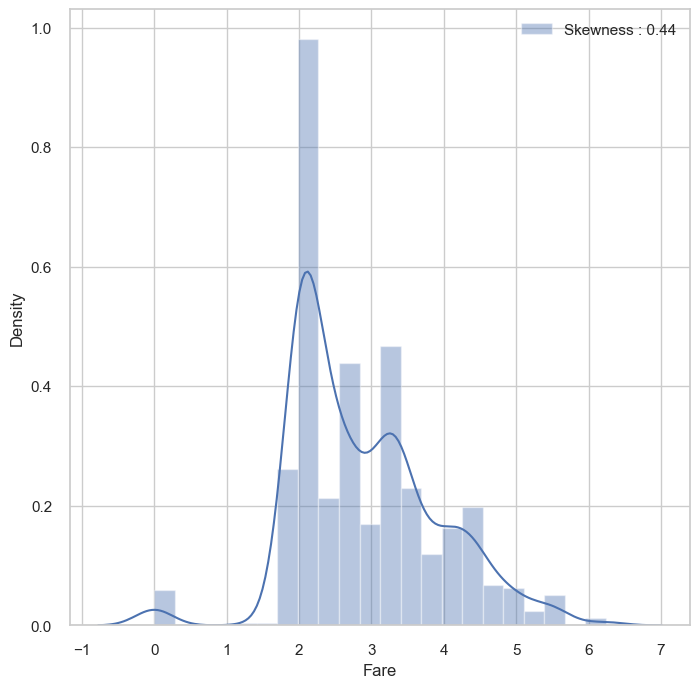

In [54]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취해 비대칭성 해소
- 이와 같이 모델 성능을 높이기 위해 feature를 조작하거나 새로운 feature를 추가하는 것을 'feature engineering'이라고 함

## **2.9. Cabin**

- '1.4 Null data check'에 따르면 값이 대부분 NaN에 해당하는 feature이므로 생존에 영향을 미치는 정보를 얻어내기 어려움
- 이럴 땐 모델링에 포함시키지 않는 것도 방법

In [55]:
df_train['Cabin'].isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

## **2.10. Ticket**

- string 데이터이므로 모델링에 사용 위해 추가 작업 필요
- 기본기 갖추는 연습 중이므로 해당 필사에서는 작업 제외

In [56]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# **3. Feature Engineering and data Cleaning**

### **3.1. convert string to numeric**

- 모델링에 피쳐 사용하려면 string 데이터를 numeric 데이터로 변경 필요
- EDA하며 모델링에 사용하기로 결정한 피쳐들의 고유값을 확인하여 string일 경우 numeric 데이터로 변경

In [57]:
df_train['Sex'].unique()
df_train['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

In [58]:
df_train['Embarked'].unique()
df_train['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

### **3.2. deal with Nan value**

- 1.4. Null data check에서 파악한 바로는 'Age', 'Fare' 피쳐에 NaN 값 일부 존재
- 결측치를 처리하는 여러 방법 존재하나, 이 노트북의 목적은 뉴메릭 데이터 모델링 튜토리얼이므로 평균 값으로 대체하거나 삭제

In [59]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [60]:
df_train['Age'].fillna(round(df_train['Age'].mean(), 1), inplace=True)

In [61]:
df_train.dropna(inplace=True)

In [62]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

- 모델링에 사용하지 않을 피쳐 제외

In [63]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

<AxesSubplot:>

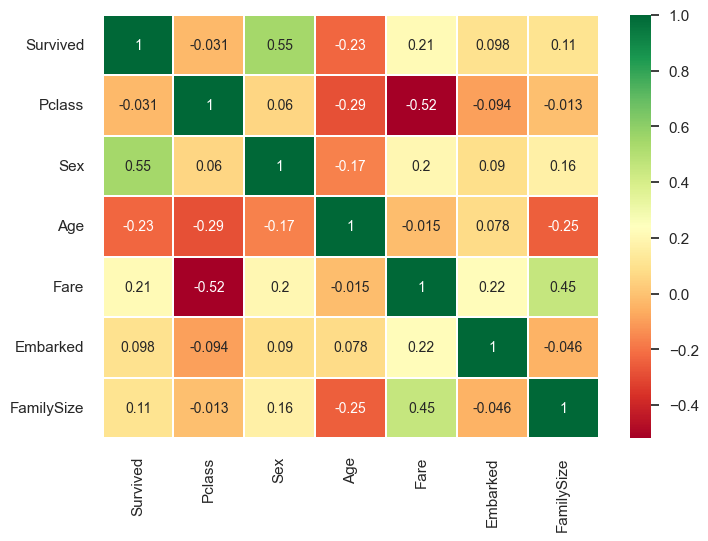

In [64]:
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 10})

# 4. Modeling

In [65]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

In [66]:
train, test = train_test_split(df_train, test_size=0.3, random_state=0, stratify=df_train['Survived'])
# stratify : 층화표집 적용

In [67]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

## **4.1. Radial Support Vector Machine(rbf-SVM)**

In [68]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
pred_svm = model.predict(test_X)
print('Accuracy for rbf SVM : ', metrics.accuracy_score(pred_svm, test_Y))

Accuracy for rbf SVM :  0.6557377049180327


## **4.2. Linear Support Vector Machine(linear-SVM)**

In [69]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
pred_linear_svm = model.predict(test_X)
print('Accuracy for linear SVM:', metrics.accuracy_score(pred_linear_svm, test_Y))

Accuracy for linear SVM: 0.7049180327868853


## **4.3. Logistic Regression**

In [70]:
model = LogisticRegression()
model.fit(train_X, train_Y)
pred_log_reg = model.predict(test_X)
print('Accuracy of Logistic Regression:', metrics.accuracy_score(pred_log_reg, test_Y))

Accuracy of Logistic Regression: 0.7704918032786885


## **4.4. Decision Tree**

In [71]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
pred_dt = model.predict(test_X)
print('Accuracy of Decision Tree :', metrics.accuracy_score(pred_dt, test_Y))

Accuracy of Decision Tree : 0.8032786885245902


## **4.5. K-Nearest Neighbors(KNN)**

In [72]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
pred_knn = model.predict(test_X)
print('Accuracy of knn :', metrics.accuracy_score(pred_knn, test_Y))

Accuracy of knn : 0.5737704918032787


- KNN 모델은 n_neighbors 인자값에 따라 성능이 변함
- 기본갑은 5이므로 최적값 찾기 위해 for loop

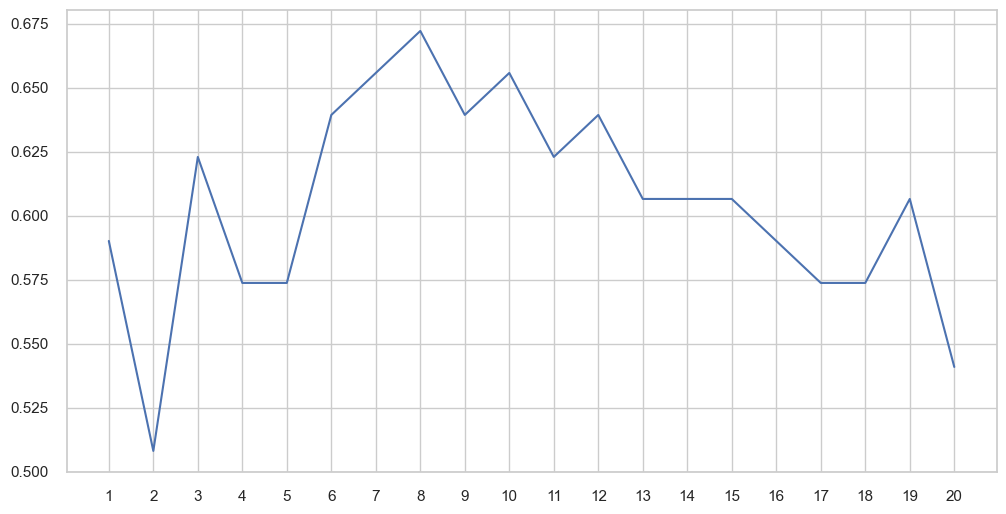

Accuracies for different value of neighbors: [0.5901639344262295, 0.5081967213114754, 0.6229508196721312, 0.5737704918032787, 0.5737704918032787, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.639344262295082, 0.6557377049180327, 0.6229508196721312, 0.639344262295082, 0.6065573770491803, 0.6065573770491803, 0.6065573770491803, 0.5901639344262295, 0.5737704918032787, 0.5737704918032787, 0.6065573770491803, 0.5409836065573771]
Max accuracy: 0.6721311475409836


In [73]:
neighbor_arr = list(range(1, 21))
score_arr = []

for i in neighbor_arr:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    pred_knn = model.predict(test_X)
    score_arr.append(metrics.accuracy_score(pred_knn, test_Y))

plt.plot(neighbor_arr, score_arr)
plt.xticks(neighbor_arr)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different value of neighbors:', score_arr)
print('Max accuracy:', max(score_arr))

## **4.6. Gaussian Naive Bayes**

In [74]:
model = GaussianNB()
model.fit(train_X, train_Y)
pred_gnb = model.predict(test_X)
print('Accuracy of Gaussian NaiveBayes:', metrics.accuracy_score(pred_gnb, test_Y))

Accuracy of Gaussian NaiveBayes: 0.7704918032786885


## **4.7. Random Forests**

In [75]:
# model = RandomForestClassifier(n_estimators=100)
# model.fit(train_X, train_Y)
# pred_rf = model.predict(test_X)
# print('Accuracy:', metrics.accuracy_score(pred_rf, test_Y))

n_estimators = list(range(100, 2001, 100))
score_arr = []

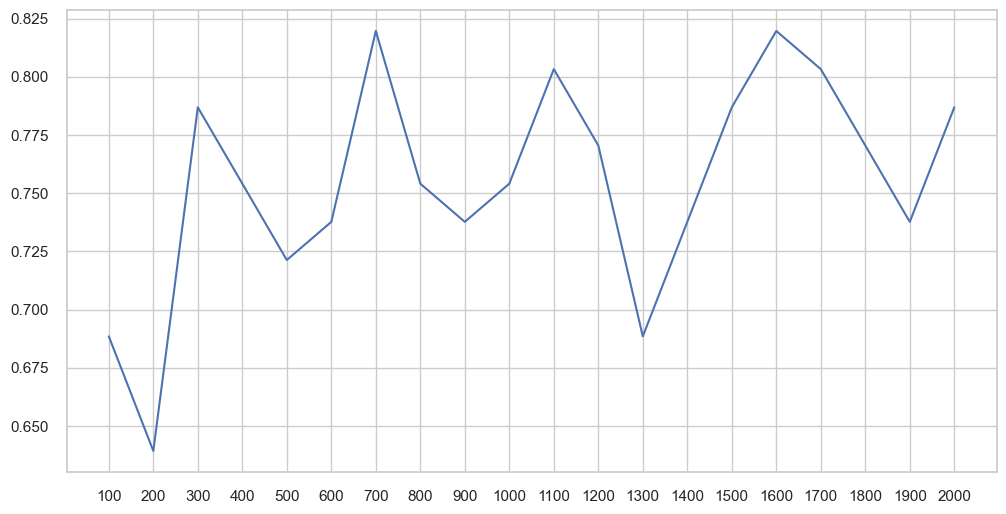

Accuracies for different value of n_estimators: [0.6885245901639344, 0.639344262295082, 0.7868852459016393, 0.7540983606557377, 0.7213114754098361, 0.7377049180327869, 0.819672131147541, 0.7540983606557377, 0.7377049180327869, 0.7540983606557377, 0.8032786885245902, 0.7704918032786885, 0.6885245901639344, 0.7377049180327869, 0.7868852459016393, 0.819672131147541, 0.8032786885245902, 0.7704918032786885, 0.7377049180327869, 0.7868852459016393]
Max accuracy: 0.819672131147541


In [76]:
for i in neighbor_arr:
    model = RandomForestClassifier(n_estimators=i)
    model.fit(train_X, train_Y)
    pred_rf = model.predict(test_X)
    score_arr.append(metrics.accuracy_score(pred_rf, test_Y))

plt.plot(n_estimators, score_arr)
plt.xticks(n_estimators)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different value of n_estimators:', score_arr)
print('Max accuracy:', max(score_arr))

- 4.1. ~ 4.7.까지 학습한 모델 중 가장 높은 성능을 내는 모델은 4.4 Decision Tree이다.
- 하지만, 해당 모델이 가장 일반화된 robust한 모델이라고 확신할 수 없다.
- 왜냐하면 train data와 test data가 바뀜에 따라 모델 성능도 달라질 것이기 때문이다. 이를 모델 분산이라고 한다.
- 그렇기 때문에 Cross Validation(교차 검증)이 필요하다.

## **4.8. Cross Validation**

In [106]:
X = df_train[df_train.columns[1:]]
Y = df_train['Survived']

n_splits = 10
kfold = KFold(n_splits=n_splits, random_state=22, shuffle=True)

xyz = []
acc_arr = []
std = []

classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regresstion', 'KNN', 'Decision Tree',
              'Naive Bayes', 'Random Forest']

models = [svm.SVC(kernel='linear'),
         svm.SVC(kernel='rbf'),
         LogisticRegression(),
         KNeighborsClassifier(n_neighbors=8),
         DecisionTreeClassifier(),
         GaussianNB(),
         RandomForestClassifier(n_estimators=400)]

for model in tqdm(models):
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    acc_arr.append(cv_result)

cv_models_df = pd.DataFrame({'CV mean': xyz, 'Std': std}, index=classifiers)
cv_models_df

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


,CV mean,Std
Linear Svm,0.718333,0.095340
Radial Svm,0.661667,0.148154
Logistic Regresstion,0.742857,0.068247
KNN,0.702857,0.109481
Decision Tree,0.772381,0.088552
Naive Bayes,0.743095,0.070224
Random Forest,0.726667,0.096772


<AxesSubplot:>

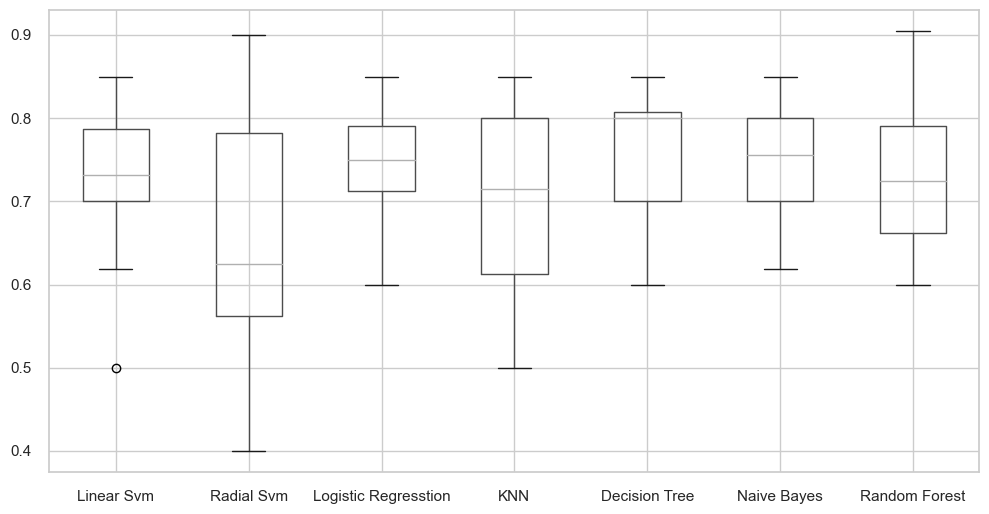

In [97]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(acc_arr, index=classifiers)
box.T.boxplot()

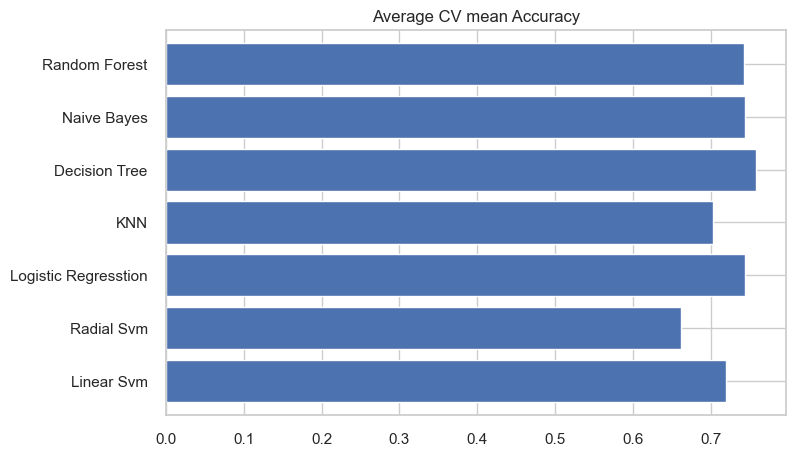

In [105]:
cv_models_df['CV mean'].plot.barh(width=0.8)
plt.title('Average CV mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

## **4.9. Confusion Matrix**

- 혼동행렬을 시각화하면 각 모델 별 예측 결과를 파악하기 용이합니다.

In [118]:
cross_val_predict

<function sklearn.model_selection._validation.cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', method='predict')>

Text(0.5, 1.0, 'KNN')

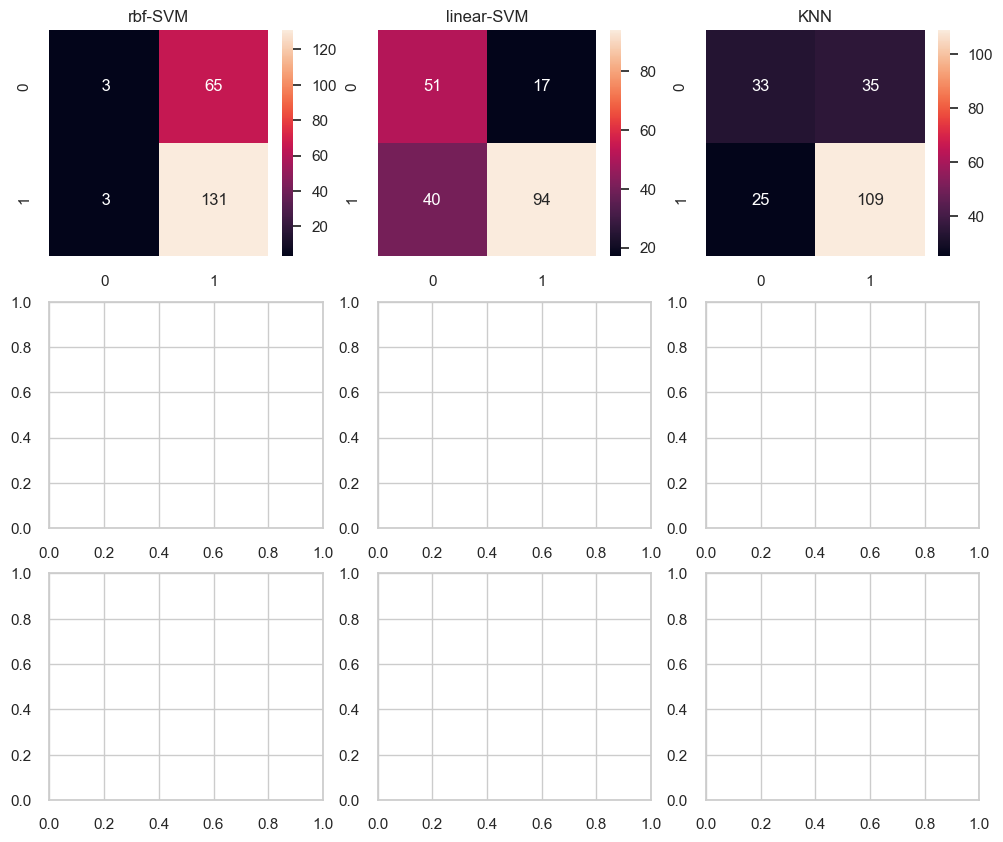

In [130]:
fmt = '2.0f'

_, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=kfold)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt=fmt)
ax[0,0].set_title('rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=kfold)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt=fmt)
ax[0,1].set_title('linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=8), X, Y, cv=kfold)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt=fmt)
ax[0,2].set_title('KNN')



In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()